# ***Volcano Research: Geothermal Unrest Data Analysis***

![Data FLow](http://modis.higp.hawaii.edu/img/modvolc_ii_test.jpg)

## **Determining Measurement Frequency of Satellites** 

### Author: Spencer Long

**Goal:** Find the measurement frequency of the two satellites , Aqua and Terra, at all 65 volcano locations on Earth.

---
---
---

## Retrieving Volcano Locations
___

We have access to a datafile with 65 different volcano locations and approximate aperture sizes. We will use this to extract location specific data fromt the [MODVOLC](http://modis.higp.hawaii.edu/cgi-bin/modisnew.cgi) database.

In [302]:
# Dependencies
import pandas as pd
from os import mkdir
from os.path import isdir
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Specify plot style
plt.style.use('seaborn')

In [368]:
# txt file of 65 Volcanoes and their name, long, lat, and ap size 

df_loc = pd.read_csv("/Users/Spencer/Desktop/Research/Volcano/Thermal_Prediction-master/data/volcanoes.txt", 
                     delimiter='\s',
                     header=None, 
                     engine='python');

df_loc.columns = ["name", "long", "lat", "aperture"]

df_loc['freq'] = np.ones(df_loc.shape[0])

df_loc.head()

,name,long,lat,aperture,freq
0,ambrym,168.12,-16.25,0.2,1.0
1,anatahan,145.67,16.35,0.2,1.0
2,aoba,167.83,-15.40,0.2,1.0
3,arenal,-84.71,10.46,0.2,1.0
4,asama,138.53,36.40,0.2,1.0


In [342]:
# Here I am selecting Kilauea as a target as an example
target = df_loc[df_loc.name == 'kilauea'].values.flatten()

# Create address of file
data_dir = f"data/{target[0]}/"

# Creates Data Folder if not already in existence at given address for created data to be exported to
if not isdir(data_dir):
    mkdir(data_dir)

## Retrieving Data For The Target
___

We have selected Kilauea as a temporary test target. Now, we will draw a box around the region and extract the data from MODVOLC.

In [343]:
from get_data import get_data

In [344]:
jyear = 2019
jday = 100
jperiod = 100000
lonmin = (target[1] - 2*target[3])
lonmax = (target[1] + 2*target[3])
latmin = (target[2] - 2*target[3])
latmax = (target[2] + 2*target[3])

df = get_data(jyear=jyear, jday=jday, jperiod=jperiod, lonmin=lonmin, lonmax=lonmax, latmin=latmin, latmax=latmax).sort_values('UNIX_Time').reset_index()
df.rename(index=str, columns={"Mo": "Month", "Dy": "Day", "Hr": "Hour", "Mn" : "Minute"}, inplace=True)

df["datetime"] = pd.to_datetime(df[["Year", "Month", "Day", "Hour", "Minute"]])
print(f"...{df.shape[0]} measurements retrieved...")

df.to_csv(f"{data_dir}data.csv")
df.head()


...71861 measurements retrieved...


,index,UNIX_Time,Sat,Year,Month,Day,Hour,Minute,Longitude,Latitude,...,SunZen,SunAzi,Line,Samp,Ratio,Glint,Excess,Temp,Err,datetime
0,71860,951512100,T,2000,2,25,20,55,-155.367538,19.778879,...,37.76,137.23,327,205,-0.58,75.460,57.119,276.8,5.6,2000-02-25 20:55:00
1,71859,951512100,T,2000,2,25,20,55,-155.351715,19.777077,...,37.76,137.25,327,206,-0.41,75.392,83.206,276.8,5.6,2000-02-25 20:55:00
2,71858,951557099,T,2000,2,26,9,25,-155.053894,19.342176,...,161.06,-59.89,1145,69,-0.79,137.327,11.860,289.2,5.9,2000-02-26 09:25:00
3,71855,951600899,T,2000,2,26,21,35,-155.027740,19.336313,...,31.05,151.53,1532,1148,-0.56,32.510,51.439,289.2,5.9,2000-02-26 21:35:00
4,71857,951600899,T,2000,2,26,21,35,-155.096741,19.372599,...,31.11,151.45,1530,1144,-0.26,32.356,114.117,288.4,4.7,2000-02-26 21:35:00


---
## Seperating Satellites Into DF's

In [309]:
terra_df = df[df['Sat'] == 'T']  
terra_df.head(3)

,index,UNIX_Time,Sat,Year,Month,Day,Hour,Minute,Longitude,Latitude,...,SunZen,SunAzi,Line,Samp,Ratio,Glint,Excess,Temp,Err,datetime
0,71860,951512100,T,2000,2,25,20,55,-155.367538,19.778879,...,37.76,137.23,327,205,-0.58,75.460,57.119,276.8,5.6,2000-02-25 20:55:00
1,71859,951512100,T,2000,2,25,20,55,-155.351715,19.777077,...,37.76,137.25,327,206,-0.41,75.392,83.206,276.8,5.6,2000-02-25 20:55:00
2,71858,951557099,T,2000,2,26,9,25,-155.053894,19.342176,...,161.06,-59.89,1145,69,-0.79,137.327,11.860,289.2,5.9,2000-02-26 09:25:00


In [310]:
aqua_df = df[df['Sat'] == 'A']
aqua_df.head(3)

,index,UNIX_Time,Sat,Year,Month,Day,Hour,Minute,Longitude,Latitude,...,SunZen,SunAzi,Line,Samp,Ratio,Glint,Excess,Temp,Err,datetime
4775,67085,1025782799,A,2002,7,4,11,40,-155.090744,19.328039,...,133.96,24.78,16,149,-0.79,128.684,10.267,290.4,6.7,2002-07-04 11:40:00
4776,67084,1025871600,A,2002,7,5,12,20,-155.084351,19.315918,...,128.97,35.38,1149,1053,-0.77,109.745,7.347,291.5,1.6,2002-07-05 12:20:00
4778,67071,1026043800,A,2002,7,7,12,10,-155.039124,19.338678,...,130.81,33.03,206,786,-0.70,126.130,17.551,291.1,5.8,2002-07-07 12:10:00


---
## Creating DF Containing Only UNIX Time

**UNIX Time:** UNIX Time is the number of seconds that have elapsed since 00:00:00 Thursday, 1 January 1970, Coordinated Universal Time (UTC), minus leap seconds. Every day is treated as if it contains exactly 86400 seconds.  
**Source:** https://en.wikipedia.org/wiki/Unix_time

In [311]:
aqua_unix_time = aqua_df['UNIX_Time']
aqua_unix_time.head(3)

4775    1025782799
4776    1025871600
4778    1026043800
Name: UNIX_Time, dtype: int64

In [312]:
terra_unix_time = terra_df['UNIX_Time']
terra_unix_time.head(3)

0    951512100
1    951512100
2    951557099
Name: UNIX_Time, dtype: int64

---
## Applying Numpy.dif Function  

**Numpy.diff():** Calculate the n-th discrete difference along the given axis.  
**Documentation:** https://docs.scipy.org/doc/numpy/reference/generated/numpy.diff.html 

Below we apply np.diff and then realised all of the zeros due to several observations at a singular time thus they needed to be removed.

In [314]:
aqua_diff = np.diff(aqua_unix_time)
aqua_diff

array([  88801,  172200,       0, ...,       0,       0, 2764800])

In [315]:
terra_diff = np.diff(terra_unix_time)
terra_diff

array([       0,    44999,    43800, ...,        0,   172200, 13218600])

## Removing Zeros From DF & Calculating Mean Time Passage:

In [316]:
# Units = Hours

# Removing zeros from DF
non_zero_aqua = aqua_unix_time[aqua_unix_time.diff() != 0]

# Calculating mean time passage in hours 
Aqua_Average_Time_Passage = non_zero_aqua.diff().mean()/60/60
Aqua_Average_Time_Passage

26.273948309893907

In [317]:
# Units = Hours

# Removing zeros from DF
non_zero_terra = terra_unix_time[terra_unix_time.diff() != 0]

# Calculating mean time passage in hours 
Terra_Average_Time_Passage = non_zero_terra.diff().mean()/60/60
Terra_Average_Time_Passage

25.00623552979357

---

## A Need For Median:

Here we plot a histogram and realize that the bin size is much larger for the median value than the mean value thus a realization that we should apply the median instead.

The median (black) is: 12.500277777777777
The mean (green) is: 25.006235529793567


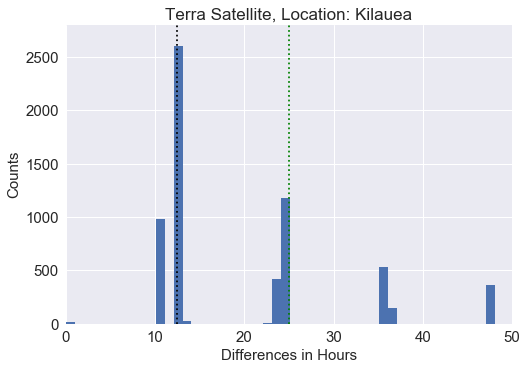

In [326]:
# Removing NaN values from DF and applying diff fucntion to x axis 
_ = non_zero_terra.diff().loc[~non_zero_terra.diff().isnull()] / 60. / 60.

# Plotting histogram
plt.hist(_, bins=np.arange(_.min(), _.max(), 1.))

# Plotting mean and median lines
plt.axvline(x = _.mean(), color = 'green', ls=':' )
plt.axvline(x = _.median(), color = 'black', ls=':' )

# Plotting parameters
plt.title('Terra Satellite, Location: Kilauea', fontsize=17)
plt.ylim(0, 2800)
plt.xlim(0, 50)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.xlabel('Differences in Hours', fontsize = 15)

print('The median (black) is:',_.median())
print('The mean (green) is:',_.mean())
plt.show()

---
# A Greater Need For Mode

When the median was calculated for Aqua we realised the most common occurance bin was not selected as the median thus the go ahead was given for the use of the mode instead. 

**Median Vs. Mode:**

Median: Denoting or relating to a value or quantity lying at the midpoint of a frequency distribution of observed values or quantities, such that there is an equal probability of falling above or below it.

Mode: The mode of a set of data values is the value that appears most often. If X is a discrete random variable, the mode is the value x at which the probability mass function takes its maximum value. In other words, it is the value that is most likely to be sampled.

### Aqua Satellite At Kilauea

The mode (black) is: 12.166666666666666
The mean (green) is: 26.27394830989391


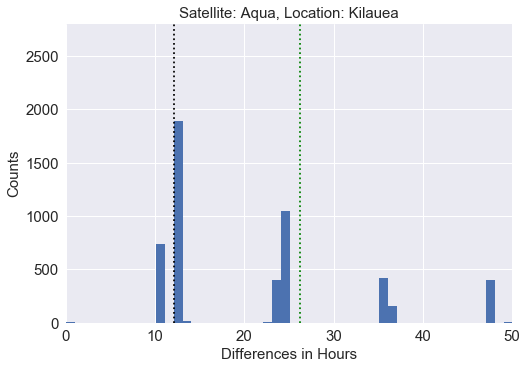

In [319]:
from scipy import stats

# Removing NaN values from DF and applying diff fucntion to x axis 
Aqua_Histogram = (non_zero_aqua.diff().loc[~non_zero_aqua.diff().isnull()] / 60. / 60.)
Aqua_Histogram_Mode = stats.mode(Aqua_Histogram)

# Plotting histogram
plt.hist(Aqua_Histogram, bins=np.arange(Aqua_Histogram.min(), Aqua_Histogram.max(), 1.))

# Plotting mean and median lines
plt.axvline(x = Aqua_Histogram.mean(), color = 'green', ls=':' )
plt.axvline(x = Aqua_Histogram_Mode[0], color = 'black', ls=':' )

# Plotting parameters
plt.ylim(0, 2800)
plt.xlim(0, 50)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.xlabel('Differences in Hours', fontsize = 15)
plt.title('Satellite: Aqua, Location: Kilauea', fontsize = 15)

print('The mode (black) is:',Aqua_Histogram.mode()[0])
print('The mean (green) is:',Aqua_Histogram.mean())
plt.show()

### Terra Satellite At Kilauea

The mode (black) is: 12.166666666666666
The mean (green) is: 25.006235529793567


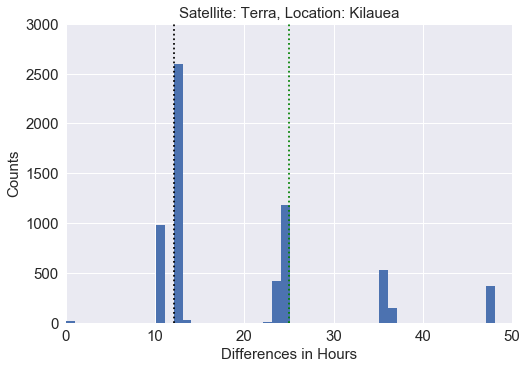

In [320]:
# Removing NaN values from DF and applying diff fucntion to x axis 
Terra_Histogram = (non_zero_terra.diff().loc[~non_zero_terra.diff().isnull()] / 60. / 60.)
Terra_Histogram_Mode = stats.mode(Terra_Histogram)

# Plotting histogram
plt.hist(Terra_Histogram, bins=np.arange(Terra_Histogram.min(), Terra_Histogram.max(), 1.))

# Plotting mean and median lines
plt.axvline(x = Terra_Histogram.mean(), color = 'green', ls=':' )
plt.axvline(x = Terra_Histogram_Mode[0], color = 'black', ls=':' )

# Plotting parameters
plt.ylim(0, 3000)
plt.xlim(0, 50)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.xlabel('Differences in Hours', fontsize = 15)
plt.title('Satellite: Terra, Location: Kilauea', fontsize = 15)

print('The mode (black) is:',Terra_Histogram.mode()[0])
print('The mean (green) is:',Terra_Histogram.mean())
plt.show()

---

# Creation of Function to Obtain Frequency of Preferred Volcano

In [424]:
def time_passage(volcano, plots = False, mean_mode = False, statistics = False):
    
    from scipy import stats
    
    try:
    
        ############ Obtaining Data ############
        
        # Reading in csv file that contains volcanoes and locations
        df_loc = pd.read_csv("/Users/Spencer/Desktop/Research/Volcano/Thermal_Prediction-master/data/volcanoes.txt", 
                             delimiter='\s', 
                             header=None, 
                             engine='python');
        # Defining names of columns within csv file
        df_loc.columns = ["name", "long", "lat", "aperture"]
        
        # Define Target Volcano and make file for data
        target = df_loc[df_loc.name == volcano].values.flatten()
    
        # Create address of file
        data_dir = f"data/{target[0]}/"
    
        # Creates Data Folder if not already in existence at given address for created data to be exported to
        if not isdir(data_dir):
            mkdir(data_dir)
        
        # Target Data wanted to be retrieved
        jyear = 2019
        jday = 100
        jperiod = 100000
        lonmin = (target[1] - 2*target[3])
        lonmax = (target[1] + 2*target[3])
        latmin = (target[2] - 2*target[3])
        latmax = (target[2] + 2*target[3])
        
        # Placing retrieved data into data frame using get_data fucntion 
        df = get_data(jyear=jyear, jday=jday, jperiod=jperiod, lonmin=lonmin, lonmax=lonmax, latmin=latmin, latmax=latmax).sort_values('UNIX_Time').reset_index()
        df.rename(index=str, columns={"Mo": "Month", "Dy": "Day", "Hr": "Hour", "Mn" : "Minute"}, inplace=True)
        
        # Setting up columns for datetime
        df["datetime"] = pd.to_datetime(df[["Year", "Month", "Day", "Hour", "Minute"]])
        
        # Saving dataframe to csv file
        df.to_csv(f"{data_dir}data.csv")
        df.head()
        
        ############ Prepping Data & Calculations ############
        
        # Seperating Data Into Seperate Sattelites
        
        aqua_sat = df[df['Sat']=='A']
        aqua_unix_diff = aqua_sat['UNIX_Time'].diff()
        aqua_unix_time = aqua_unix_diff[aqua_unix_diff!=0]/60/60
        aqua_unix_time = aqua_unix_time[~aqua_unix_time.isnull()]
    
        terra_sat = df[df['Sat']=='A']
        terra_unix_diff = terra_sat['UNIX_Time'].diff()
        terra_unix_time = terra_unix_diff[terra_unix_diff!=0]/60/60 
        terra_unix_time = terra_unix_time[~terra_unix_time.isnull()]
        
        # Obtaining mode of each dataframe
        
        terra_unix_time_mode = stats.mode(terra_unix_time) # for plotting
        aqua_unix_time_mode = stats.mode(aqua_unix_time) # for plotting
        terra_mode = terra_unix_time.mode()[0] # for printing
        aqua_mode = aqua_unix_time.mode()[0] # for printing
        
        ############ Mean & Mode ############
        
        if mean_mode == True:
            
            terra_unix_time_mean = terra_unix_time.mean()
            aqua_unix_time_mean = aqua_unix_time.mean()
            
            print(f'#######Mean of {volcano.title()}#######')
            print('The Aqua mode of',volcano,'is:', aqua_mode)
            print('The Terra mode of',volcano,'is:', terra_mode)
            print('The Aqua mean of',volcano,'is:', aqua_unix_time_mean)
            print('The Terra mean of',volcano,'is:', terra_unix_time_mean)
            print('############################################# \n')        
        
        ############ Creating Plots ############
        
        if plots == True:
            
            ###### Aqua ######
            
            # Removing NaN values from DF and applying diff fucntion to x axis 
            Aqua_Histogram = aqua_unix_time
            Aqua_Histogram_Mode = stats.mode(Aqua_Histogram)
            
            # Plotting histogram
            plt.hist(Aqua_Histogram, bins=np.arange(Aqua_Histogram.min(), Aqua_Histogram.max(), 1.))
            
            # Plotting mean and median lines
            plt.axvline(x = Aqua_Histogram.mean(), color = 'green', ls=':' )
            plt.axvline(x = Aqua_Histogram_Mode[0], color = 'black', ls=':' )
            
            # Plotting parameters
            plt.ylim(0, 2800)
            plt.xlim(0, 50)
            plt.xticks(fontsize = 15)
            plt.yticks(fontsize = 15)
            plt.ylabel('Counts', fontsize = 15)
            plt.xlabel('Differences in Hours', fontsize = 15)
            plt.title(f'Satellite: Aqua at location: {volcano.title()}',fontsize = 15)
            
            print(f"...{df.shape[0]} measurements retrieved for {volcano.title()}...")
            print(f'######## Histogrma of Aqua at {volcano.title()} ########')
            print('The mode (black) is:',Aqua_Histogram.mode()[0])
            print('The mean (green) is:',Aqua_Histogram.mean())
            plt.show()
            
            ###### Terra ######
            
            # Removing NaN values from DF and applying diff fucntion to x axis 
            Terra_Histogram = terra_unix_time
            Terra_Histogram_Mode = stats.mode(Terra_Histogram)
            
            # Plotting histogram
            plt.hist(Terra_Histogram, bins=np.arange(Terra_Histogram.min(), Terra_Histogram.max(), 1.))
            
            # Plotting mean and median lines
            plt.axvline(x = Terra_Histogram.mean(), color = 'green', ls=':' )
            plt.axvline(x = Terra_Histogram_Mode[0], color = 'black', ls=':' )
            
            # Plotting parameters
            plt.ylim(0, 3000)
            plt.xlim(0, 50)
            plt.xticks(fontsize = 15)
            plt.yticks(fontsize = 15)
            plt.ylabel('Counts', fontsize = 15)
            plt.xlabel('Differences in Hours', fontsize = 15)
            plt.title(f'Satellite: Terra at location: {volcano.title()}', fontsize = 15)
            
            print(f'######## Histogrma of Terra at {volcano.title()} ########')
            print('The mode (black) is:',Terra_Histogram.mode()[0])
            print('The mean (green) is:',Terra_Histogram.mean())
            plt.show()
        
        ############ Print modes & number of measurements ############
        
        if statistics == True:
            
            df_loc = pd.read_csv("/Users/Spencer/Desktop/Research/Volcano/Thermal_Prediction-master/data/volcanoes.txt", 
                                 delimiter='\s',
                                 names = ["name", "long", "lat", "aperture"],
                                 index_col='name',
                                 header=None, 
                                 engine='python')
            
            print(f'#######Statistics of {volcano.title()}#######')
            print('Volcano:', volcano.title(), ', Latitude:', df_loc.loc[volcano]['lat'])
            print(f"{df.shape[0]} measurements were retrieved for {volcano.title()} ")
            print('The Aqua mode of',volcano,'is:', aqua_mode)
            print('The Terra mode of',volcano,'is:', terra_mode)
            print('############################################# \n')
                
    except(IndexError):
        print('Error: \n')
        print(f'Unable to compute mode for {volcano.title()} due to measurements only totalling {df.shape[0]}... \n')
        

---
# Calculating Statistics For All Volcanoes:

In [421]:
for volcano in df_loc['name']:
    time_passage(volcano,statistics=True)

#######Statistics of Ambrym#######
Volcano: Ambrym , Latitude: -16.25
4936 measurements were retrieved for Ambrym 
The Aqua mode of ambrym is: 47.833333333333336
The Terra mode of ambrym is: 47.833333333333336
############################################# 

#######Statistics of Anatahan#######
Volcano: Anatahan , Latitude: 16.35
339 measurements were retrieved for Anatahan 
The Aqua mode of anatahan is: 47.833333333333336
The Terra mode of anatahan is: 47.833333333333336
############################################# 

#######Statistics of Aoba#######
Volcano: Aoba , Latitude: -15.4
185 measurements were retrieved for Aoba 
The Aqua mode of aoba is: 24.666666666666668
The Terra mode of aoba is: 24.666666666666668
############################################# 

#######Statistics of Arenal#######
Volcano: Arenal , Latitude: 10.46
406 measurements were retrieved for Arenal 
The Aqua mode of arenal is: 12.250277777777777
The Terra mode of arenal is: 12.250277777777777
######################

---
# Example of Calculating Stats & Histogram:

...4936 measurements retrieved for Ambrym...
######## Histogrma of Aqua at Ambrym ########
The mode (black) is: 47.833333333333336
The mean (green) is: 161.97975284339458


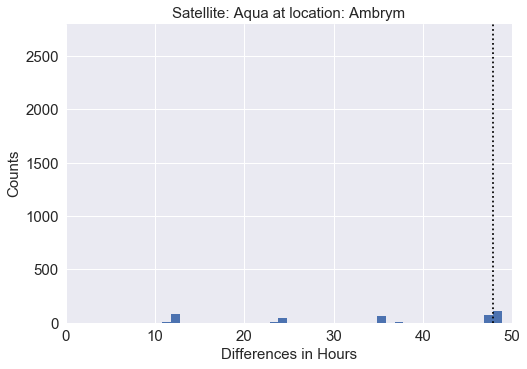

######## Histogrma of Terra at Ambrym ########
The mode (black) is: 47.833333333333336
The mean (green) is: 161.97975284339458


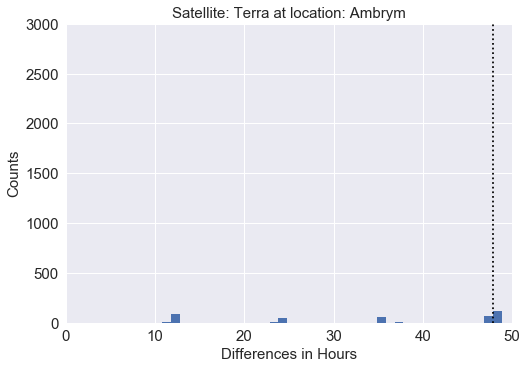

#######Statistics of Ambrym#######
Volcano: Ambrym , Latitude: -16.25
4936 measurements were retrieved for Ambrym 
The Aqua mode of ambrym is: 47.833333333333336
The Terra mode of ambrym is: 47.833333333333336
############################################# 

...339 measurements retrieved for Anatahan...
######## Histogrma of Aqua at Anatahan ########
The mode (black) is: 47.833333333333336
The mean (green) is: 390.25845410628017


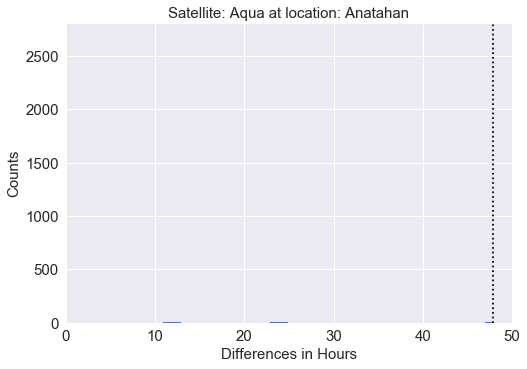

######## Histogrma of Terra at Anatahan ########
The mode (black) is: 47.833333333333336
The mean (green) is: 390.25845410628017


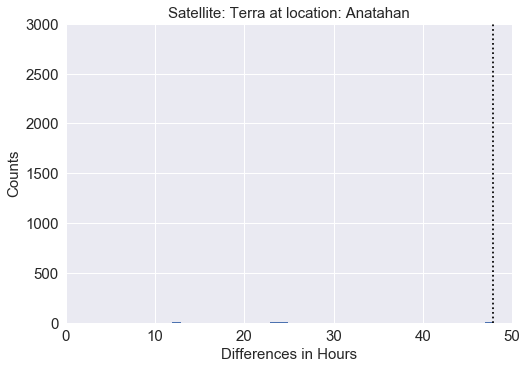

#######Statistics of Anatahan#######
Volcano: Anatahan , Latitude: 16.35
339 measurements were retrieved for Anatahan 
The Aqua mode of anatahan is: 47.833333333333336
The Terra mode of anatahan is: 47.833333333333336
############################################# 



In [413]:
for i in df_loc['name'][0:2]:
    time_passage(i,statistics=True,plots = True)

---
# Example of Error Message For Non Computation of Mode:

In [423]:
time_passage(df_loc['name'][6], statistics = True)

Error: 

Unable to compute mode for Awu due to measurements only totalling 8... 



---
# For Future Creation of Exporting Results --> .csv File:

In [ ]:
if export_data == True:
    df_loc = pd.read_csv("/Users/Spencer/Desktop/Research/Volcano/Thermal_Prediction-master/data/volcanoes.txt", 
             delimiter='\s',
             names = ["name", "long", "lat", "aperture"],
             index_col='name',
             header=None, 
             engine='python')

    df_loc.loc[volcano]['freq'] = aqua_mode
    
    df_loc.to_csv("data.csv")